In [2]:
#setup, importing modules
import os
os.system("sudo apt-get update")
os.system("sudo apt-get install -y python3-opencv")
os.system("pip install opencv-python")
os.system("pip install matplotlib")
os.system("pip install pandas")
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Get:1 http://archive.ubuntu.com/ubuntu jammy InRelease [270 kB]
Get:2 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]
Get:5 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [1505 kB]
Get:6 http://archive.ubuntu.com/ubuntu jammy/universe amd64 Packages [17.5 MB]
Get:7 http://security.ubuntu.com/ubuntu jammy-security/multiverse amd64 Packages [44.6 kB]
Get:8 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [1864 kB]
Get:9 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1073 kB]
Get:10 http://archive.ubuntu.com/ubuntu jammy/multiverse amd64 Packages [266 kB]
Get:11 http://archive.ubuntu.com/ubuntu jammy/main amd64 Packages [1792 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy/restricted amd64 Packages [164 kB]
Get:13 http://archive.ubuntu.com/ubuntu jam

debconf: delaying package configuration, since apt-utils is not installed


Fetched 160 MB in 8s (19.0 MB/s)
Selecting previously unselected package poppler-data.
(Reading database ... 77262 files and directories currently installed.)
Preparing to unpack .../000-poppler-data_0.4.11-1_all.deb ...
Unpacking poppler-data (0.4.11-1) ...
Selecting previously unselected package gdal-data.
Preparing to unpack .../001-gdal-data_3.4.1+dfsg-1build4_all.deb ...
Unpacking gdal-data (3.4.1+dfsg-1build4) ...
Selecting previously unselected package libcdparanoia0:amd64.
Preparing to unpack .../002-libcdparanoia0_3.10.2+debian-14build2_amd64.deb ...
Unpacking libcdparanoia0:amd64 (3.10.2+debian-14build2) ...
Selecting previously unselected package liborc-0.4-0:amd64.
Preparing to unpack .../003-liborc-0.4-0_1%3a0.4.32-2_amd64.deb ...
Unpacking liborc-0.4-0:amd64 (1:0.4.32-2) ...
Selecting previously unselected package libgstreamer-plugins-base1.0-0:amd64.
Preparing to unpack .../004-libgstreamer-plugins-base1.0-0_1.20.1-1ubuntu0.1_amd64.deb ...
Unpacking libgstreamer-plugins-


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.1/159.1 kB 3.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 39.5 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.7/310.7 kB 6.5 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 36.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 24.9 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 30.7 MB/s eta 0:00:00:00:01



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 25.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 28.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.5/505.5 kB 11.9 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.4/345.4 kB 9.1 MB/s eta 0:00:00:00:01



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [3]:
#functions
def normit(image):

    """ function for reading in an image file, taking it's color histograms and normailizing them. """
    hist = cv2.calcHist([image],[0,1,2],None,[255,255,255],[0,256,0,256,0,256])
    normalized_hist = cv2.normalize(hist, hist, 0, 1.0, cv2.NORM_MINMAX)
    return(normalized_hist)

def count_hist_dist(filename,name_list,image_list,n_returns):

    """function for finding Distance from a set image file's color histograms.
    filename: the name of the file, which will be the target
    name_list: a list of all filenames the comparison should include
    image_list: a list of images. the images are loaded in, with three colour channels and two spacial
    dimensions. The list of images should have the same length and order as the list of names.
    n_returns: (int) how many filenames and distances should be returned."""

    #find target according file index
    target_ind = name_list.index(filename) 
    #create target comparison hist
    target = normit(image_list[target_ind])

    #compare to target
    comp_list =[]
    for i in image_list:
        norm =  normit(i)
        histcomp = round(cv2.compareHist(target,norm,cv2.HISTCMP_CHISQR), 2)
        #save comparison values
        comp_list.append(histcomp)

    #assign filenames to comparison values

    df_pd = pd.DataFrame({"Filename":name_list})
    df_pd["Distance"] = comp_list

    #sort and filter
    #sort ascending
    df_sorted = df_pd.sort_values(axis=0, by= "Distance", ascending= True)
    #drops 1st entry (it's the target image themselves)
    df_sorted = df_sorted.query('Distance != 0')
    #keeps 5 closest images
    df_fin = df_sorted[:n_returns]

    return(df_fin)


In [5]:
#load in files
# loop load all flowers and names and save it
fp = os.path.join("..","in")
fp_s = sorted(os.listdir(fp))


image_list = []
name_list = []
for i in fp_s:
    filepath = os.path.join(fp,i)
    image = cv2.imread(filepath)
    names = i
    name_list.append(i)
    image_list.append(image)

In [25]:
#Find distances for e.g. target file "image_0121.jpg"

target_name = "image_0121.jpg"
count_df = count_hist_dist(target_name,name_list,image_list,5)

In [1]:
#save output
out_p = os.path.join("..","out",target_name + "_comp.csv")
count_df.to_csv(out_p, index=False)

NameError: name 'os' is not defined

In [31]:
#checking outputs

import matplotlib as mpl
# jimshow commisioned from utils
def jimshow(image, title=False):
    """imshow with matplotlib dependencies 
    """
    # Acquire default dots per inch value of matplotlib
    dpi = mpl.rcParams['figure.dpi']

    height, width, depth = image.shape
    figsize = width / float(dpi), height / float(dpi)
    
    plt.figure(figsize=figsize)
    
    if depth == 1:
        plt.imshow(image, cmap='gray')
    else:
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
      
    if title:
        plt.title(title)
    plt.axis('off')
    
    plt.show()


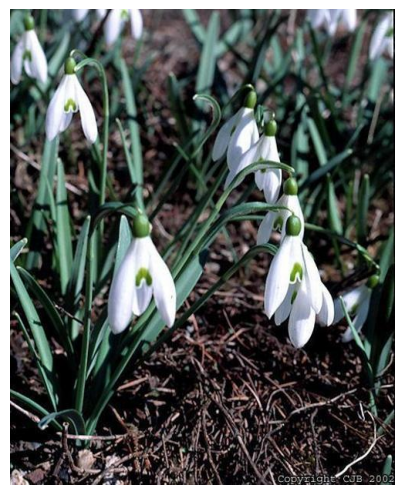

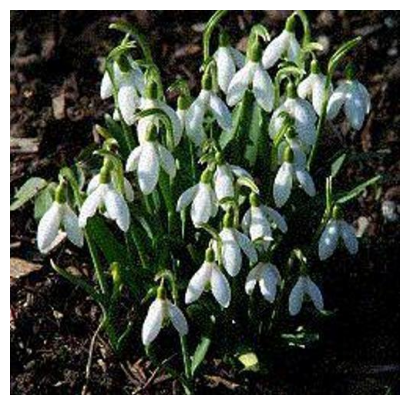

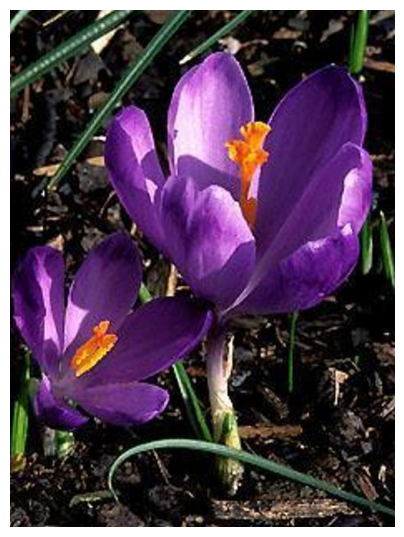

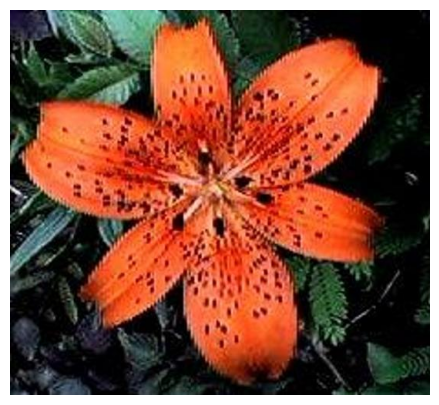

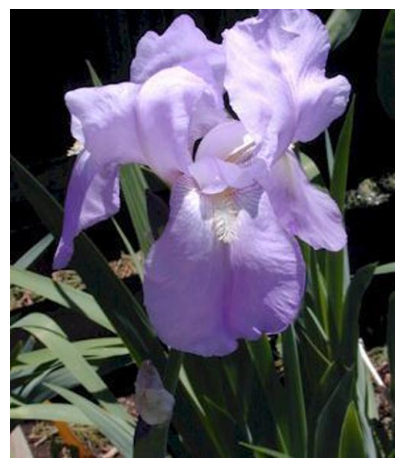

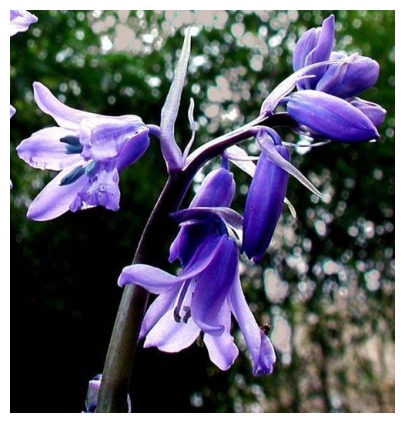

In [36]:
#take output csv
fp = os.path.join("..","out", "")
fp_i = fp + os.listdir(fp)[0]

#save result names from the csv
results = pd.read_csv(fp_i)
close_list = results["Filename"]
#save og_filename from the name of the csv
og_file = os.listdir(fp)[0].replace("_comp.csv","")

#data folder
in_path = os.path.join("..","in") + "/"


og_pic = cv2.imread(in_path + og_file)
jimshow(og_pic)
for i in close_list:
    temp_pic = cv2.imread(in_path + i)
    jimshow(temp_pic)
